## Classification demo including training

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [8]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset\\training_set',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [11]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'dogs': 1, 'cats': 0}


In [13]:
## Importng test data
test_set = test_datagen.flow_from_directory('dataset\\test_set',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [22]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
17/17 [==============================] - 3s 204ms/step - loss: 0.3484 - acc: 0.8428 - val_loss: 0.7917 - val_acc: 0.6316
Epoch 2/5
17/17 [==============================] - 3s 190ms/step - loss: 0.2178 - acc: 0.9312 - val_loss: 1.0763 - val_acc: 0.6053
Epoch 3/5
17/17 [==============================] - 3s 191ms/step - loss: 0.2029 - acc: 0.8930 - val_loss: 1.3488 - val_acc: 0.5789
Epoch 4/5
17/17 [==============================] - 3s 197ms/step - loss: 0.1271 - acc: 0.9410 - val_loss: 1.4804 - val_acc: 0.5789
Epoch 5/5
17/17 [==============================] - 3s 181ms/step - loss: 0.0991 - acc: 0.9705 - val_loss: 1.4513 - val_acc: 0.5789


## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [15]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('dataset\\single_prediction\\dog.jpg'
                           ,target_size =(64,64))


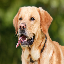

In [16]:
test_image

In [17]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [18]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [19]:
result = classifier.predict(test_image)

In [20]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
   prediction = 'cat'
    

In [21]:
prediction

'cat'

In [ ]:
#steps_per_epoch=50